In [1]:
import numpy as np
import pandas as pd
import plotly.express as px


# Load the NetCDF file
filename="filtered_data_test_100_percent.h5"
file_directory = r"C:\Users\vm2218\OneDrive - Imperial College London\PhD Project\seaducks\data"
data_path = f"{file_directory}/{filename}"
dataset = pd.read_hdf(data_path)

In [2]:
# drifter lifetimes

drifter_lifetimes = dataset["id"].value_counts()\
    .to_frame()\
    .copy()
drifter_lifetimes.rename(columns = {"id":"Drifter id","count":"Lifetime"},inplace=True)
print("Drifter IDs with the longest lifetimes: %s"%drifter_lifetimes.head(20)[["Lifetime"]])

Drifter IDs with the longest lifetimes:           Lifetime
id                
122571        1281
9423721       1241
9729812       1116
9423569       1090
9423764       1002
9624910        991
9423579        815
9524510        808
63942780       806
63941310       806
28840          802
9619732        785
9524491        774
9619734        770
63940950       763
9525461        763
9423465        763
9217772        756
9828853        753
9423754        735


In [4]:
# drifter visualisation

drifter_id=9423569       
#drifter_id =9812989 	 ## plot by specific drifter
dd= dataset.query("id == @drifter_id")
#print(dd[['u','u_filtered','v','v_filtered','Tx','Tx_filtered','Ty','Ty_filtered','Wx','Wx_filtered','Wy','Wy_filtered']].head(30))
drifter_lat = np.array(dd["lat"])
drifter_lon = np.array(dd["lon"])
drifter_coords = [tuple([(x,y) for x,y in zip(drifter_lon, drifter_lat)])]

fig = px.scatter_mapbox(dd, 
                        lat="lat", 
                        lon="lon",  
                        height=400,
                        width=400,
                        zoom=3,
                        color_discrete_sequence=["pink"])

fig3 = px.scatter_mapbox(dd.head(1),
                        lat="lat",
                        lon="lon",
                        color_discrete_sequence=["blue"])
fig4= px.scatter_mapbox(dd.tail(1),
                        lat="lat",
                        lon="lon",
                        color_discrete_sequence=["red"])

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_traces(marker={"size": 3})
fig.add_trace(fig3.data[0]) # mark start
fig.add_trace(fig4.data[0]) # mark end
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

PermissionError: [Errno 13] Permission denied: b'D:\\PhD\\ocean-datasets\\derived_data\\sst\\sst_gradients_t0_t3.nc'

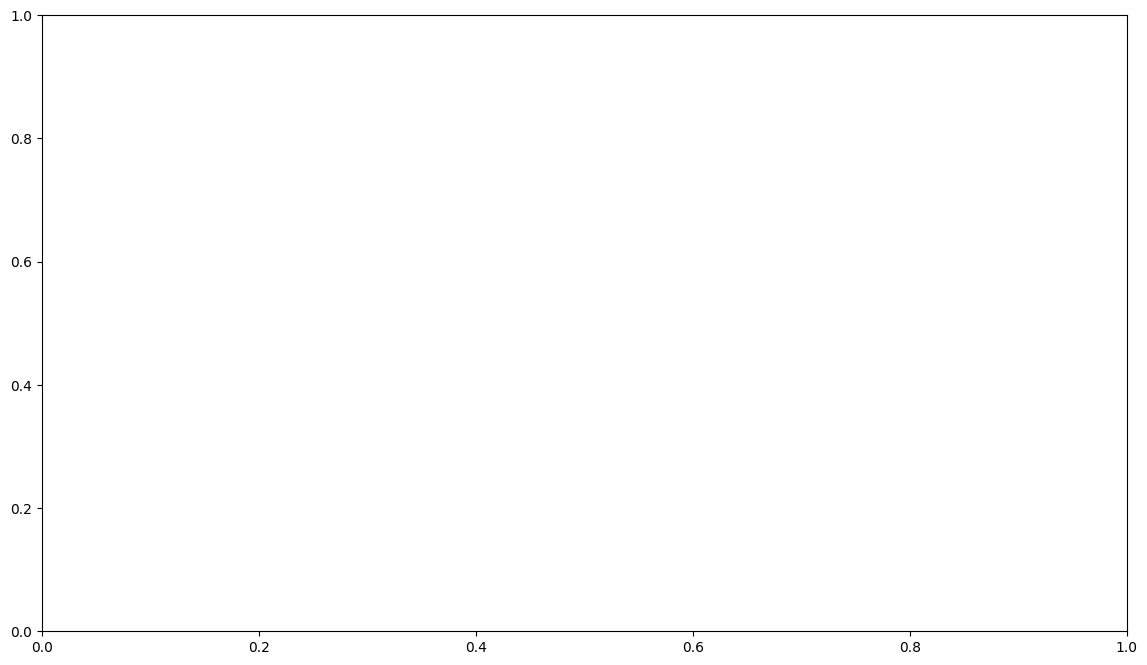

In [11]:
import matplotlib.pyplot as plt
import os
import xarray as xr
fig, ax1 = plt.subplots(figsize=(14,8))

filename=r"CMEMS_West_NA_sst_2012_2022.nc"
file_directory = r"D:\PhD\ocean-datasets\copernicus-data"
# Load the NetCDF file
output_directory = r"D:\PhD\ocean-datasets\derived_data\sst"
output_filename = r"sst_gradients_t0_t3.nc"
output_path = os.path.join(output_directory, output_filename)

dataset = xr.open_dataset(output_path)
#sst = dataset['analysed_sst'].isel(time=0)
sst_grad = dataset['sst_gradient_y'].isel(time=2)

# note to self: sst.loc[lat,lon].values gives the value at a specific lat and lon
#lat,lon = sst.indexes.values()
#lat[:-5]
sst_grad.plot(cmap='seismic',vmin=-30,vmax=30)
plt.show()
#vals = np.zeros(sst.shape)
#vals.fill(np.nan)
#vals
#sst.loc[0.025:1.00,-71.125].values


In [8]:
display(xr.open_dataset(output_path))

AttributeError: module 'xarray' has no attribute 'close'